<a href="https://colab.research.google.com/github/bloonyJ/Abaqus/blob/main/Curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score

warnings.simplefilter('ignore', np.RankWarning)

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Refprop tables.xlsx to Refprop tables.xlsx


In [47]:
filename = 'Refprop tables.xlsx'

data_HeW = pd.read_excel(filename, sheet_name='He Warm')
t_HeW = data_HeW['T (K)']
d_HeW = data_HeW['Density (kg/m3)']
u_HeW = data_HeW['Viscosity (Pa-s)']

data_HeC = pd.read_excel(filename, sheet_name='He Cold')
t_HeC = data_HeC['T (K)']
d_HeC = data_HeC['Density (kg/m3)']
u_HeC = data_HeC['Viscosity (Pa-s)']

data_H2 = pd.read_excel(filename, sheet_name='H2')
t_H2 = data_H2['T (K)']
d_H2 = data_H2['Density (kg/m3)']
u_H2 = data_H2['Viscosity (Pa-s)']

In [8]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=30) # figure title 폰트 크기

In [48]:
def fitting(x, d, u, nd, nu):
  fit_d = np.polyfit(x, d, nd)
  fit_u = np.polyfit(x, u, nu)
  r2_d = r2_score(d, np.poly1d(fit_d)(x))
  r2_u = r2_score(u, np.poly1d(fit_u)(x))
  return fit_d, fit_u, r2_d, r2_u

def visu(x, d_o, d, u_o, u):
  fig = plt.figure(figsize = (24, 10))

  fig_d = fig.add_subplot(1,2,1)
  fig_d.scatter(x, d_o, color='red')
  fig_d.plot(x, np.polyval(d, x), color='blue')
  fig_d.legend(['original data', 'fitting'], loc='best')
  fig_d.set_title("Density")
  fig_d.grid()

  fig_u = fig.add_subplot(1,2,2)
  fig_u.scatter(x, u_o, color='red')
  fig_u.plot(x, np.polyval(u, x), color='blue')
  fig_u.legend(['original data', 'fitting'], loc='best')
  fig_u.set_title("Viscosity")
  fig_u.grid()
  plt.show()

def visud(x, d_o, d, title):
  plt.figure(figsize = (12, 10))
  plt.scatter(x, d_o, color='red')
  plt.plot(x, np.polyval(d, x), color='blue')
  plt.legend(['original data', 'fitting'], loc='best')
  plt.title(title)
  plt.grid()
  plt.savefig(title, dpi=300)
  plt.show()
  
def visuu(x, d_o, d, title):
  plt.figure(figsize = (12, 10))
  plt.scatter(x, d_o, color='red')
  plt.plot(x, np.polyval(d, x), color='blue')
  plt.legend(['original data', 'fitting'], loc='best')
  plt.title(title)
  plt.grid()
  plt.savefig(title, dpi=300)
  plt.show()


density order: 8, viscosity order: 4
--------------------He Warm---------------------
density: [ 2.03212897e-18 -4.58493856e-15  4.34201129e-12 -2.24261758e-09
  6.87344131e-07 -1.27530872e-04  1.40247622e-02 -8.58219231e-01
  2.57104513e+01]
viscosity: [-2.66402056e-16  3.46049846e-13 -1.79423884e-10  8.83486177e-08
  2.36872677e-06]
density R2: 0.9976196615065938
viscosity R2: 0.9999231392663481

--------------------He Cold---------------------
density: [ 4.61445657e-19 -1.04208455e-15  9.88023122e-13 -5.11082006e-10
  1.56962359e-07 -2.92061748e-05  3.22526452e-03 -1.98625768e-01
  6.00819049e+00]
viscosity: [-2.82881818e-16  3.65863047e-13 -1.88118506e-10  9.00995713e-08
  2.20406189e-06]
density R2: 0.9979225189597452
viscosity R2: 0.9999109340420788

-----------------------H2-----------------------
density: [ 3.22616048e-19 -7.28503081e-16  6.90477763e-13 -3.56884067e-10
  1.09422419e-07 -2.02910146e-05  2.22486114e-03 -1.34872134e-01
  3.92468060e+00]
viscosity: [-1.65814230e-1

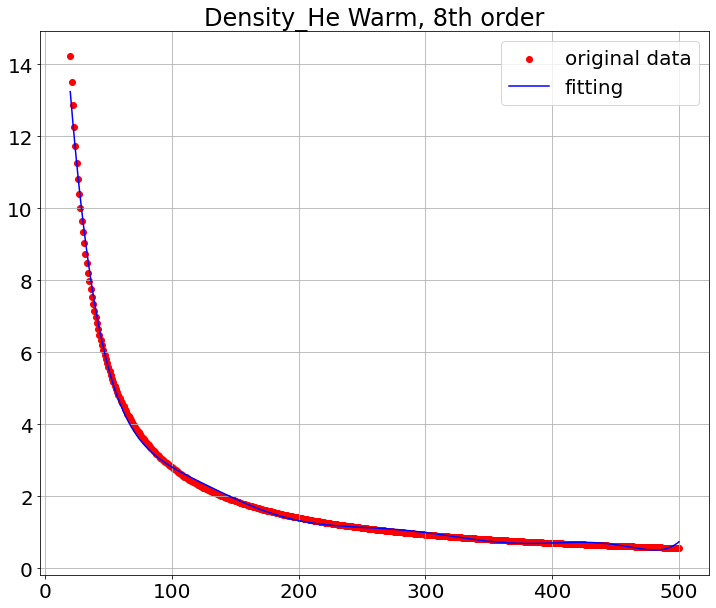

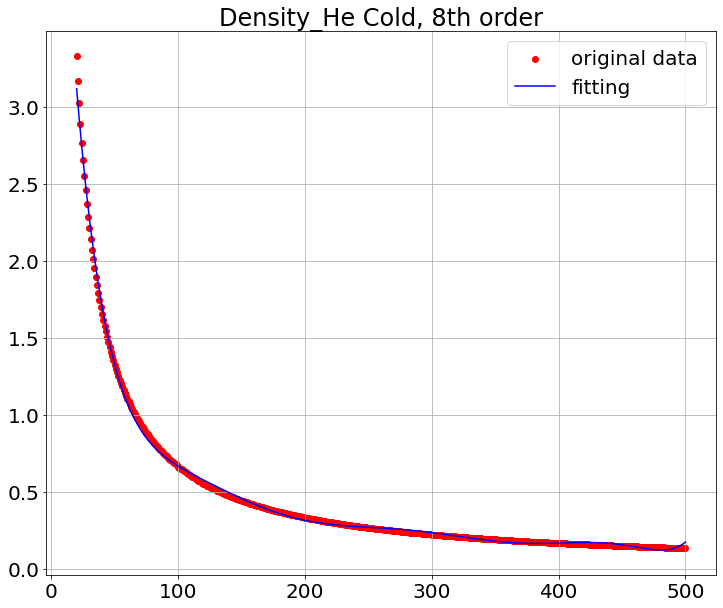

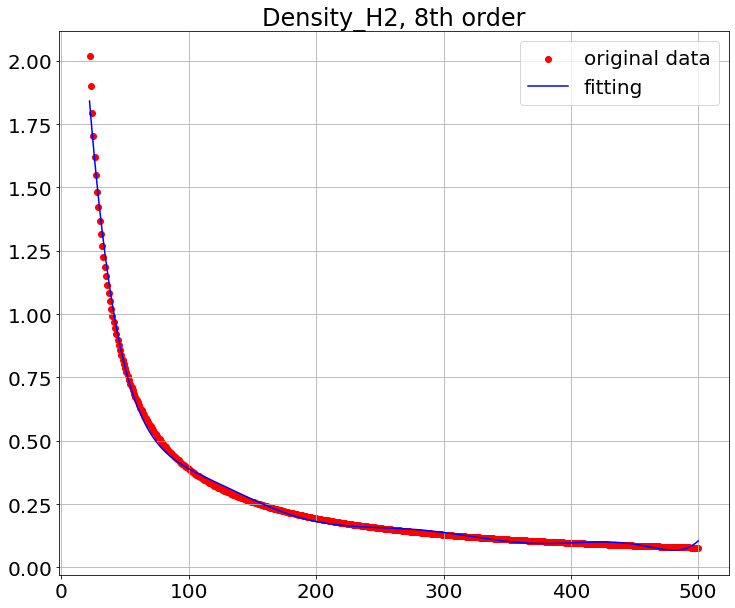

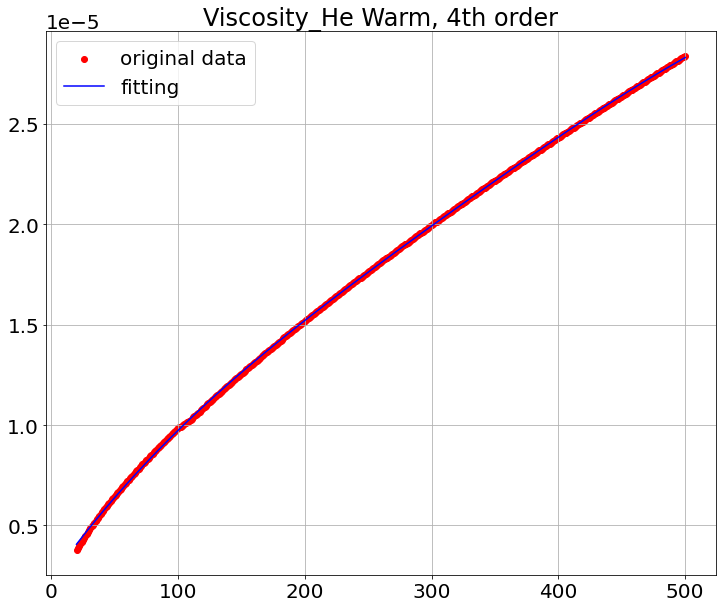

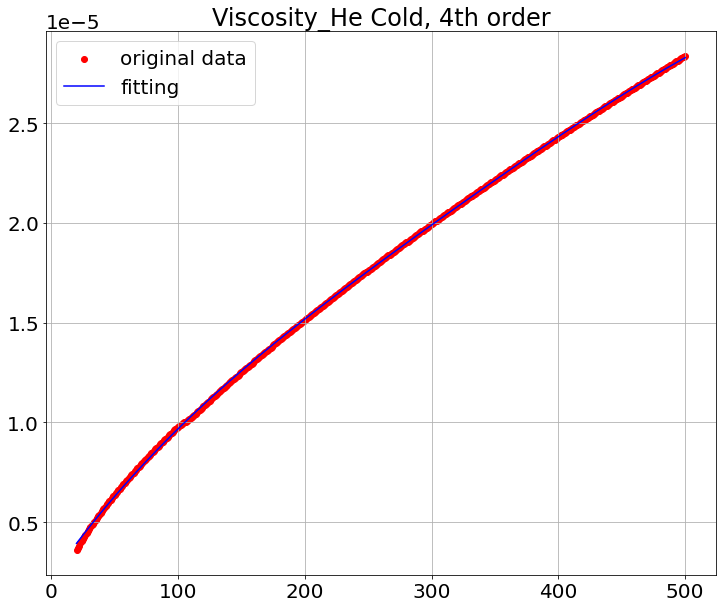

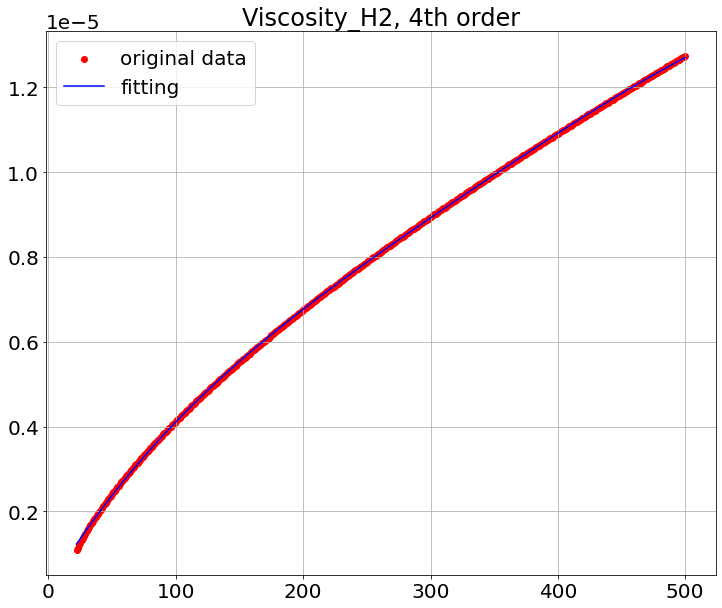

In [51]:
d_order = 8
u_order = 4

density_HeW_8, viscosity_HeW_8, r2_d_HeW_8, r2_u_HeW_8 = fitting(t_HeW, d_HeW, u_HeW, d_order, u_order)
density_HeC_8, viscosity_HeC_8, r2_d_HeC_8, r2_u_HeC_8 = fitting(t_HeC, d_HeC, u_HeC, d_order, u_order)
density_H2_8, viscosity_H2_8, r2_d_H2_8, r2_u_H2_8 = fitting(t_H2, d_H2, u_H2, d_order, u_order)

print(f"\ndensity order: {d_order}, viscosity order: {u_order}")
print("--------------------He Warm---------------------")
print(f"density: {density_HeW_8}\nviscosity: {viscosity_HeW_8}")
print(f"density R2: {r2_d_HeW_8}\nviscosity R2: {r2_u_HeW_8}")
print("\n--------------------He Cold---------------------")
print(f"density: {density_HeC_8}\nviscosity: {viscosity_HeC_8}")
print(f"density R2: {r2_d_HeC_8}\nviscosity R2: {r2_u_HeC_8}")
print("\n-----------------------H2-----------------------")
print(f"density: {density_H2_8}\nviscosity: {viscosity_H2_8}")
print(f"density R2: {r2_d_H2_8}\nviscosity R2: {r2_u_H2_8}")


visud(t_HeW, d_HeW, density_HeW_8, "Density_He Warm, 8th order")
visud(t_HeC, d_HeC, density_HeC_8, "Density_He Cold, 8th order")
visud(t_H2, d_H2, density_H2_8, "Density_H2, 8th order")
visuu(t_HeW, u_HeW, viscosity_HeW_8, "Viscosity_He Warm, 4th order")
visuu(t_HeC, u_HeC, viscosity_HeC_8, "Viscosity_He Cold, 4th order")
visuu(t_H2, u_H2, viscosity_H2_8, "Viscosity_H2, 4th order")

density order: 6, viscosity order: 4
--------------------He Warm---------------------
density: [ 6.32246510e-14 -1.09811772e-10  7.56391519e-08 -2.62890381e-05
  4.85300937e-03 -4.59211881e-01  1.96745517e+01]
viscosity: [-2.66402056e-16  3.46049846e-13 -1.79423884e-10  8.83486177e-08
  2.36872677e-06]
density R2: 0.9891925779681593
viscosity R2: 0.9999231392663481
--------------------He Cold---------------------
density: [ 1.46710608e-14 -2.55024359e-11  1.75856550e-08 -6.12144637e-06
  1.13256416e-03 -1.07531726e-01  4.62954837e+00]
viscosity: [-2.82881818e-16  3.65863047e-13 -1.88118506e-10  9.00995713e-08
  2.20406189e-06]
density R2: 0.990023018588838
viscosity R2: 0.9999109340420788
-----------------------H2-----------------------
density: [ 9.39562349e-15 -1.63329161e-11  1.12598228e-08 -3.91588017e-06
  7.22689774e-04 -6.81620359e-02  2.87935732e+00]
viscosity: [-1.65814230e-16  2.22620520e-13 -1.17113999e-10  4.85929000e-08
  2.16298014e-07]
density R2: 0.9864100106120868
visc

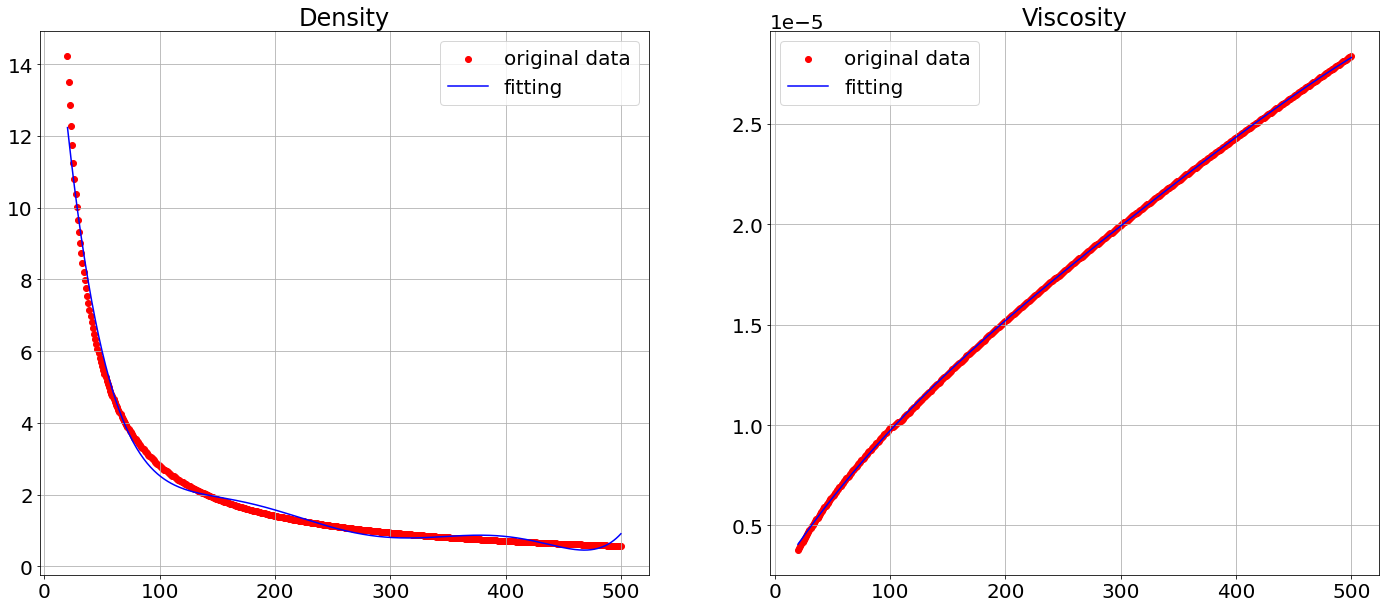

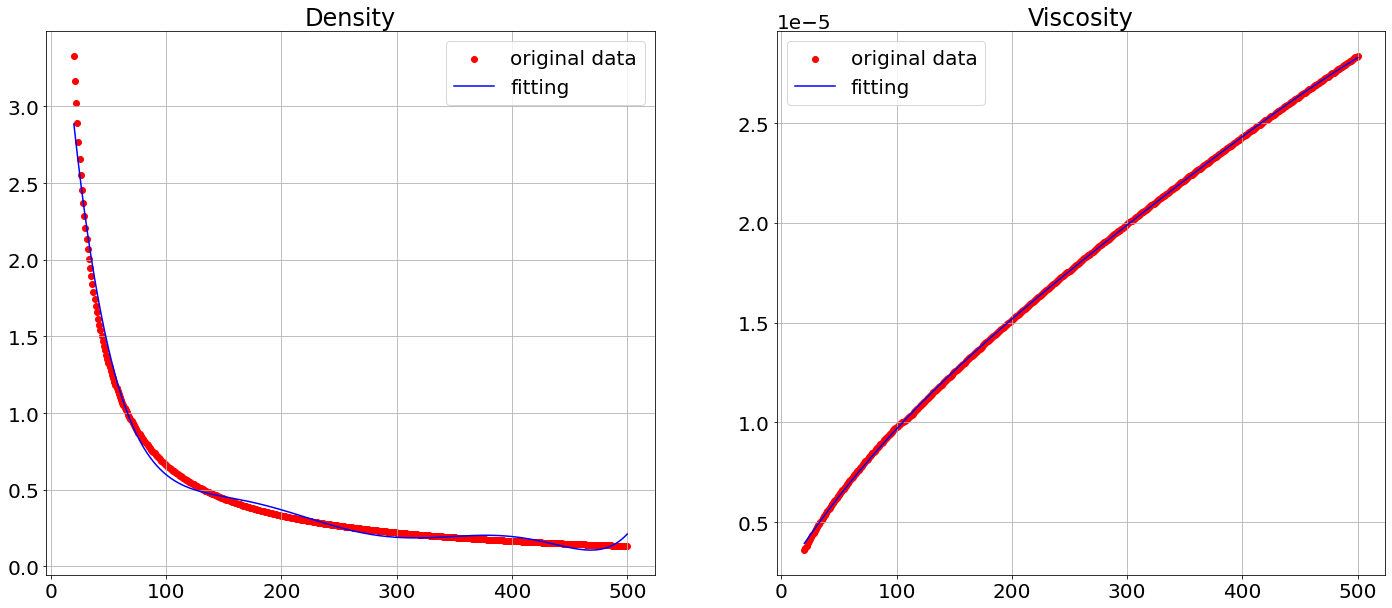

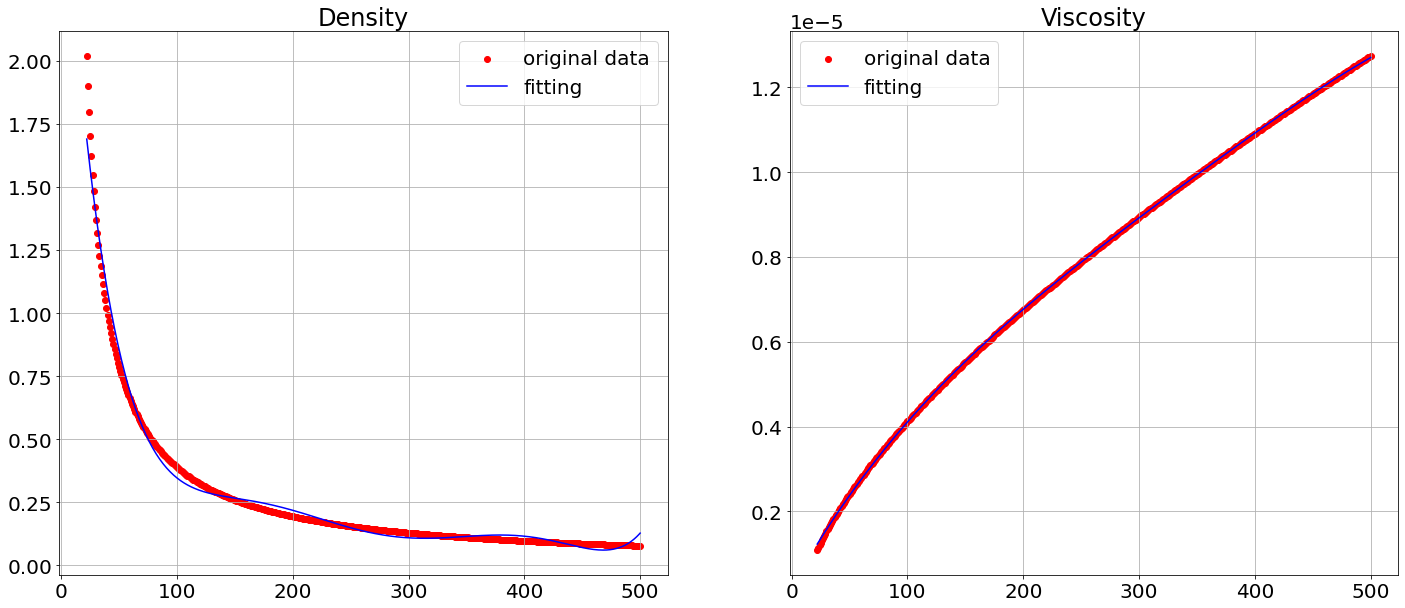

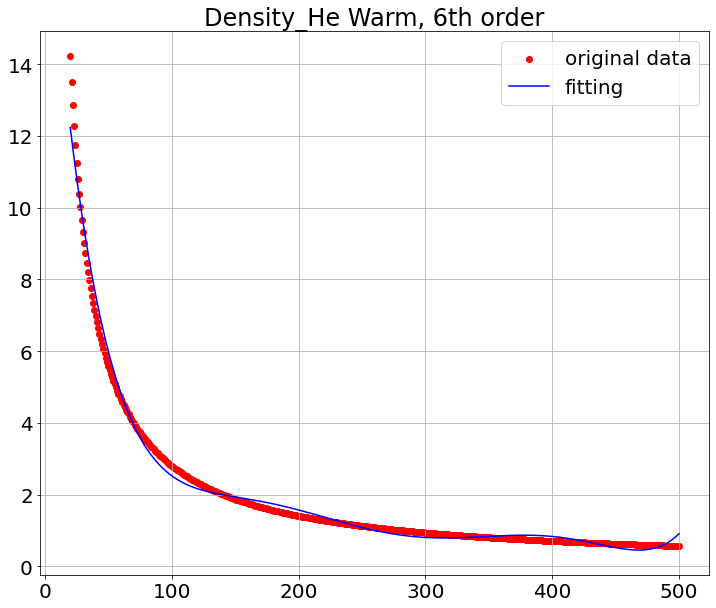

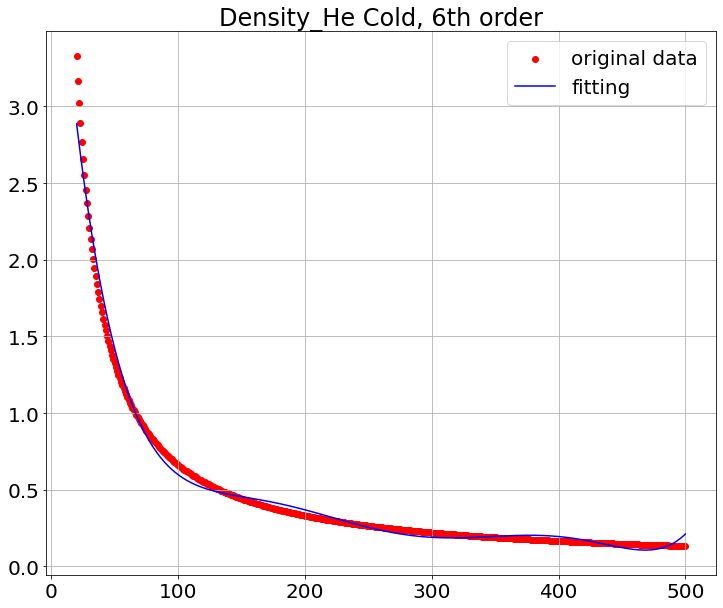

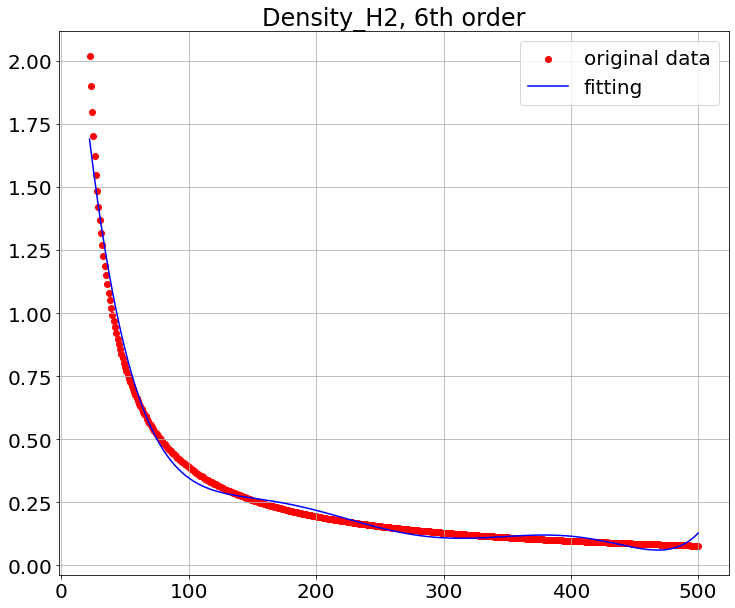

In [52]:
d_order = 6
u_order = 4

density_HeW_6, viscosity_HeW_6, r2_d_HeW_6, r2_u_HeW_6 = fitting(t_HeW, d_HeW, u_HeW, d_order, u_order)
density_HeC_6, viscosity_HeC_6, r2_d_HeC_6, r2_u_HeC_6 = fitting(t_HeC, d_HeC, u_HeC, d_order, u_order)
density_H2_6, viscosity_H2_6, r2_d_H2_6, r2_u_H2_6 = fitting(t_H2, d_H2, u_H2, d_order, u_order)

print(f"density order: {d_order}, viscosity order: {u_order}")
print("--------------------He Warm---------------------")
print(f"density: {density_HeW_6}\nviscosity: {viscosity_HeW_6}")
print(f"density R2: {r2_d_HeW_6}\nviscosity R2: {r2_u_HeW_6}")
print("--------------------He Cold---------------------")
print(f"density: {density_HeC_6}\nviscosity: {viscosity_HeC_6}")
print(f"density R2: {r2_d_HeC_6}\nviscosity R2: {r2_u_HeC_6}")
print("-----------------------H2-----------------------")
print(f"density: {density_H2_6}\nviscosity: {viscosity_H2_6}")
print(f"density R2: {r2_d_H2_6}\nviscosity R2: {r2_u_H2_6}")


visu(t_HeW, d_HeW, density_HeW_6, u_HeW, viscosity_HeW_6)
visu(t_HeC, d_HeC, density_HeC_6, u_HeC, viscosity_HeC_6)
visu(t_H2, d_H2, density_H2_6, u_H2, viscosity_H2_6)
visud(t_HeW, d_HeW, density_HeW_6, "Density_He Warm, 6th order")
visud(t_HeC, d_HeC, density_HeC_6, "Density_He Cold, 6th order")
visud(t_H2, d_H2, density_H2_6, "Density_H2, 6th order")

In [ ]:
density_HeW_old = [10.5934739739893, -0.106212413270089, 0.000433701677926858, -0.000000860737180937264, 0.000000000880958652160098, -0.000000000000446951628534996, 0.000000000000000088908113748278]
density_HeC_old = [2.50792956888566, -0.0251481766871901, 0.000102656884098684, -0.000000203679850645633, 0.000000000208420836485404, -0.000000000000105724555976889, 0.000000000000000021028198061527]
density_H2_old = [1.86447559714985, -0.0257710457744538, 0.000150409711068331, -0.000000434318069806864, 0.000000000653057339881141, -0.000000000000489572949819793, 0.000000000000000144429651962873]
density_HeW_old = density_HeW_old[::-1]
density_HeC_old = density_HeC_old[::-1]
density_H2_old = density_H2_old[::-1]
visu2(t_HeW, d_HeW, density_HeW_old)
visu2(t_HeC, d_HeC, density_HeC_old)
visu2(t_H2, d_H2, density_H2_old)

In [64]:
print(f"density order: {d_order}, viscosity order: {u_order}")
def out(lt):
  print("[", end="")
  for i in lt[::-1]:
    if i == lt[0]:
      print(i, end="")
    else:
      print(i, end=", ")
  print("]\n")

print("\n--------------------He Warm---------------------")
print("density")
out(density_HeW_8)
print("viscosity")
out(viscosity_HeW_8)
print("\n--------------------He Cold---------------------")
print("density")
out(density_HeC_8)
print("viscosity")
out(viscosity_HeC_8)
print("-----------------------H2-----------------------")
print("density")
out(density_H2_8)
print("viscosity")
out(viscosity_H2_8)

density order: 6, viscosity order: 4

--------------------He Warm---------------------
density
[25.71045133658821, -0.8582192314150224, 0.014024762216105914, -0.000127530872234733, 6.873441308090637e-07, -2.242617577896564e-09, 4.342011285114248e-12, -4.584938561842045e-15, 2.0321289716579574e-18]

viscosity
[2.3687267702026435e-06, 8.834861765197102e-08, -1.7942388412110855e-10, 3.460498462669716e-13, -2.6640205638075194e-16]


--------------------He Cold---------------------
density
[6.008190492195624, -0.19862576811784943, 0.003225264521160906, -2.9206174830441947e-05, 1.569623593806035e-07, -5.110820059636082e-10, 9.88023122283133e-13, -1.0420845548328728e-15, 4.61445657103977e-19]

viscosity
[2.2040618933131014e-06, 9.009957134257707e-08, -1.8811850603971578e-10, 3.6586304692191706e-13, -2.8288181819115604e-16]

-----------------------H2-----------------------
density
[3.924680596579995, -0.13487213350588947, 0.0022248611393387296, -2.029101460335713e-05, 1.0942241921856512e-07, -

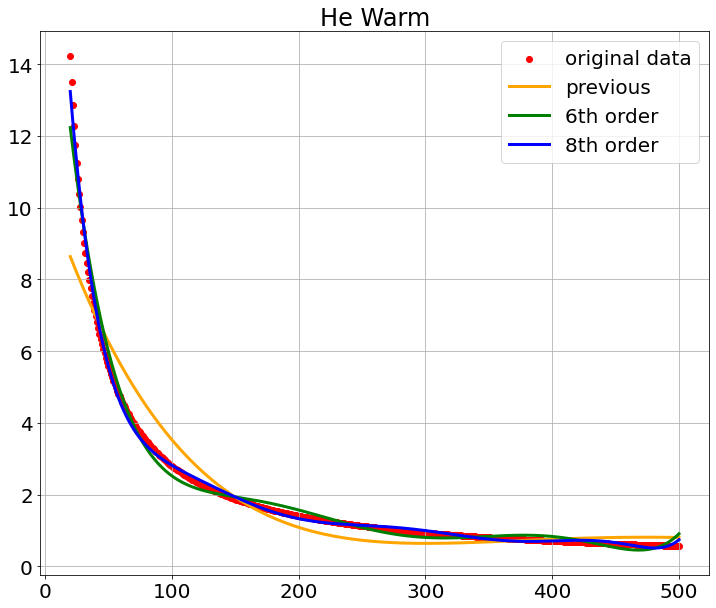

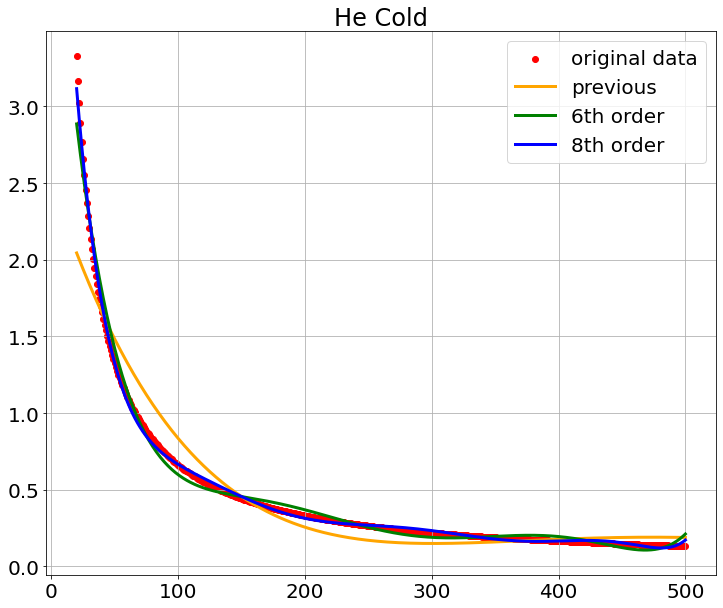

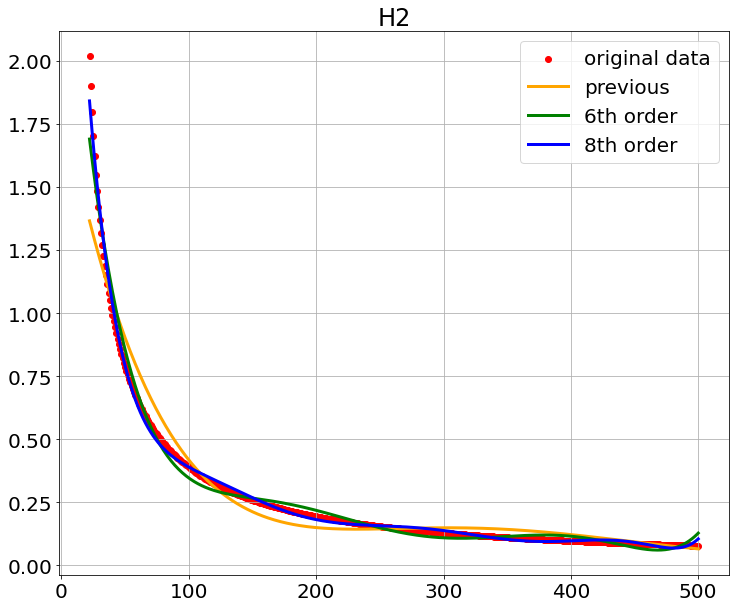

In [78]:
def visu_all(x, d_o, d_6, d_8, d_old, title):
  plt.figure(figsize = (12, 10))
  plt.scatter(x, d_o, color='red')
  plt.plot(x, np.polyval(d_old, x), linewidth="3", color='orange')
  plt.plot(x, np.polyval(d_6, x), linewidth="3", color='green')
  plt.plot(x, np.polyval(d_8, x), linewidth="3", color='blue')
  plt.plot
  plt.legend(['original data', 'previous', '6th order', '8th order'], loc='best')
  plt.title(title)
  plt.grid()
  plt.savefig(title, dpi=300)
  plt.show()

visu_all(t_HeW, d_HeW, density_HeW_6, density_HeW_8, density_HeW_old, "He Warm")
visu_all(t_HeC, d_HeC, density_HeC_6, density_HeC_8, density_HeC_old, "He Cold")
visu_all(t_H2, d_H2, density_H2_6, density_H2_8, density_H2_old, "H2")